In [2]:
#pip install plotly 
import sys
!{sys.executable} -m pip install xgboost

In [3]:
import numpy as np # linear algebra
import pandas as pd # data frame 
#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px #more common and simple use
import plotly.graph_objects as go #work moslty on graph objects (more heavy and dynamic) easier to control
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ztest as ztest
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import scipy
plt.style.use('seaborn-deep')
import plotly.graph_objects as go

In [4]:
# העלאת קובץ הדו"חות הכספיים מעיריות
df_iriya= pd.read_csv('C:\\iriya.csv')

C:\anc\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# EDA

In [5]:
df_iriya.head()

,קוד_רשות,שם_רשות,קוד_למס,שנת_דוח,תקופה,שנת_נתונים,סוג_דוח,גיליון,שורה,עמודה,קודמיפוי,ערך
0,﻿3008,אום אל-פחם,92710,2016,שנתי,2016,דוח כספי שנתי מבוקר,נתונים לטופס 1,יתרה לתחילת שנה,שנה נוכחית,1,-54167.0
1,3008,אום אל-פחם,92710,2017,שנתי,2017,דוח כספי שנתי מבוקר,נתונים לטופס 1,יתרה לתחילת שנה,שנה נוכחית,1,-63613.0
2,3008,אום אל-פחם,92710,2018,שנתי,2018,דוח כספי שנתי מבוקר,נתונים לטופס 1,יתרה לתחילת שנה,שנה נוכחית,1,-77741.0
3,3008,אום אל-פחם,92710,2016,שנתי,2015,דוח כספי שנתי מבוקר,נתונים לטופס 1,יתרה לתחילת שנה,שנה קודמת,2,-42510.0
4,3008,אום אל-פחם,92710,2017,שנתי,2016,דוח כספי שנתי מבוקר,נתונים לטופס 1,יתרה לתחילת שנה,שנה קודמת,2,-54167.0


In [1086]:
df_iriya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   קוד_רשות    1048575 non-null  object 
 1   שם_רשות     1048575 non-null  object 
 2   קוד_למס     1048575 non-null  int64  
 3   שנת_דוח     1048575 non-null  int64  
 4   תקופה       1048575 non-null  object 
 5   שנת_נתונים  1048575 non-null  int64  
 6   סוג_דוח     1048575 non-null  object 
 7   גיליון      1048575 non-null  object 
 8   שורה        1048575 non-null  object 
 9   עמודה       1048575 non-null  object 
 10  קודמיפוי    1048575 non-null  int64  
 11  ערך         817243 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 96.0+ MB


In [1087]:
df_iriya.shape

(1048575, 12)

In [1088]:
df_iriya.nunique()

קוד_רשות          70
שם_רשות           68
קוד_למס           68
שנת_דוח            3
תקופה              1
שנת_נתונים         6
סוג_דוח            1
גיליון            35
שורה             834
עמודה            151
קודמיפוי        5507
ערך           137808
dtype: int64

In [6]:
# מחיקת עמודות לא נחוצות 
df_iriya.drop(['קוד_רשות','קוד_למס','שנת_דוח','תקופה','סוג_דוח','גיליון','עמודה','קודמיפוי'], axis=1, inplace=True)

In [11]:
#שינוי שמות העמודה
df_iriya.columns = ['entity','year', 'feature', 'value']


,entity,year,feature,value
0,אום אל-פחם,2016,יתרה לתחילת שנה,-54167.0
1,אום אל-פחם,2017,יתרה לתחילת שנה,-63613.0
2,אום אל-פחם,2018,יתרה לתחילת שנה,-77741.0
3,אום אל-פחם,2015,יתרה לתחילת שנה,-42510.0
4,אום אל-פחם,2016,יתרה לתחילת שנה,-54167.0
...,...,...,...,...
1048570,ראשון לציון,2016,חגיגות מבצעים וארועים,NaN
1048571,ראשון לציון,2017,חגיגות מבצעים וארועים,NaN
1048572,ראשון לציון,2016,שרותים עירוניים שונים,1566.0
1048573,ראשון לציון,2017,שרותים עירוניים שונים,1601.0


In [13]:
#הורדת שנת 2014 כי לא נמצא מאזן הגירה לשנה זו 
df_iriya2=df_iriya[df_iriya.year != 2014]


,entity,year,feature,value
0,אום אל-פחם,2016,יתרה לתחילת שנה,-54167.0
1,אום אל-פחם,2017,יתרה לתחילת שנה,-63613.0
2,אום אל-פחם,2018,יתרה לתחילת שנה,-77741.0
3,אום אל-פחם,2015,יתרה לתחילת שנה,-42510.0
4,אום אל-פחם,2016,יתרה לתחילת שנה,-54167.0
...,...,...,...,...
1048570,ראשון לציון,2016,חגיגות מבצעים וארועים,NaN
1048571,ראשון לציון,2017,חגיגות מבצעים וארועים,NaN
1048572,ראשון לציון,2016,שרותים עירוניים שונים,1566.0
1048573,ראשון לציון,2017,שרותים עירוניים שונים,1601.0


In [14]:
#מציאת ערכים חסרים
df_iriya2.isna().any(axis=1).sum()

229010

In [19]:
# השמטת שורות עם ערכים חסרים
df1=df_iriya2.dropna()
df1.reset_index(drop=True)

,entity,year,feature,value
0,אום אל-פחם,2016,יתרה לתחילת שנה,-54167.0
1,אום אל-פחם,2017,יתרה לתחילת שנה,-63613.0
2,אום אל-פחם,2018,יתרה לתחילת שנה,-77741.0
3,אום אל-פחם,2015,יתרה לתחילת שנה,-42510.0
4,אום אל-פחם,2016,יתרה לתחילת שנה,-54167.0
...,...,...,...,...
815388,ראשון לציון,2016,חגיגות מבצעים וארועים,385.0
815389,ראשון לציון,2015,חגיגות מבצעים וארועים,176.0
815390,ראשון לציון,2016,שרותים עירוניים שונים,1566.0
815391,ראשון לציון,2017,שרותים עירוניים שונים,1601.0


In [20]:
# הורדת כפילויות
df6=df1.drop_duplicates(subset=['entity','year','feature'])


,entity,year,feature,value
0,אום אל-פחם,2016,יתרה לתחילת שנה,-54167.0
1,אום אל-פחם,2017,יתרה לתחילת שנה,-63613.0
2,אום אל-פחם,2018,יתרה לתחילת שנה,-77741.0
3,אום אל-פחם,2015,יתרה לתחילת שנה,-42510.0
6,אום אל-פחם,2016,שינויים ביתרה לתחילת השנה - סכומים להקטנ,4898.0
...,...,...,...,...
1048563,ראשון לציון,2016,חגיגות מבצעים וארועים,392.0
1048569,ראשון לציון,2015,חגיגות מבצעים וארועים,176.0
1048572,ראשון לציון,2016,שרותים עירוניים שונים,1566.0
1048573,ראשון לציון,2017,שרותים עירוניים שונים,1601.0


In [21]:
# הפיכת המאפיינים לעמודות
nofilter = df6.assign(val=1).pivot_table(columns='feature',index=['entity','year'],values='value',fill_value=0).reset_index()
nofilter


feature,entity,year,אגרות,אגרות בניה,אגרת ביוב,אגרת מים,אגרת מים וביוב,אדמה חקלאית,אדמת בניין,אזורי תעשיה משותפים,...,"תשלומים בשנת הדוח בתב""ר",תשלומים לא רגילים,תשלומים לא רגילים אחר 3 (*),תשלומים לא רגילים אחר 4 (*),תשלומים לא רגילים אחר 5 (*),תשלומים לסוף השנה,תשלומים לתחילת השנה,"תשלומים לתחילת השנה בתב""ר",תשלומים מקרן לעבודות פיתוח,תשלומים שונים - הבראה ביגוד טלפון קצו
0,אום אל-פחם,2015,645,0,0,0.0,0,0.000000,0.000,0.0,...,27919.0,26471,750,0,0.0,70479.0,73085,73085,10291.0,9176.0
1,אום אל-פחם,2016,762,0,38,551.0,0,0.009259,0.138,0.0,...,58191.0,31137,2344,2524,18127.0,75153.0,70479,70479,6491.0,9818.0
2,אום אל-פחם,2017,465,0,39,571.0,0,0.009423,0.000,0.0,...,27545.0,31275,0,4660,80.0,85425.0,75153,75153,20975.0,10333.0
3,אום אל-פחם,2018,934,0,41,603.0,0,0.009629,0.000,0.0,...,49437.0,46820,0,4754,1215.0,96372.0,85425,85425,7111.0,10609.0
4,אום אל-פחם,2019,0,0,0,0.0,0,0.000000,0.000,0.0,...,0.0,0,0,0,0.0,0.0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,ראש העין,2019,0,0,0,0.0,0,0.000000,0.000,0.0,...,0.0,0,0,0,0.0,0.0,0,0,0.0,0.0
335,ראשון לציון,2015,1768,0,0,0.0,0,0.000000,0.000,0.0,...,0.0,0,0,0,0.0,0.0,0,0,0.0,0.0
336,ראשון לציון,2016,1530,37,0,0.0,0,0.000000,0.000,0.0,...,0.0,0,0,0,0.0,0.0,0,0,0.0,0.0
337,ראשון לציון,2017,1930,436,0,0.0,0,0.000000,0.000,0.0,...,0.0,0,0,0,0.0,0.0,0,0,0.0,0.0


In [22]:
nofilter.nunique()

feature
entity                                    68
year                                       5
אגרות                                    244
אגרות בניה                               120
אגרת ביוב                                152
                                        ... 
תשלומים לסוף השנה                        269
תשלומים לתחילת השנה                      269
תשלומים לתחילת השנה בתב"ר                269
תשלומים מקרן לעבודות פיתוח               268
תשלומים שונים - הבראה ביגוד טלפון קצו    267
Length: 784, dtype: int64

In [24]:
# קוד המראה את אחוז האפסים בעמודה מסוימת 
df_zero2=pd.DataFrame((nofilter == 0).astype(int).sum(axis=0)/339)
df_zero2.columns = ['p_zero']
df_zero2

,p_zero
feature,
entity,0.000000
year,0.000000
אגרות,0.224189
אגרות בניה,0.604720
אגרת ביוב,0.507375
...,...
תשלומים לסוף השנה,0.209440
תשלומים לתחילת השנה,0.209440
"תשלומים לתחילת השנה בתב""ר",0.209440


In [25]:
# מספר העמודות בעלות 60% ערכים (ללא אפסים)
(df_zero2<=0.4).sum()

p_zero    390
dtype: int64

In [26]:
# השגת שמות העמודות
index = df_zero2.index
condition = df_zero2['p_zero'] <=0.4
feature_indices = index[condition]
feature_indices_list = feature_indices.tolist()
print(feature_indices_list)

['entity', 'year', 'אגרות', 'אדמה חקלאית', 'אחוז גביה מהסה"כ', 'אחוז גביה מהפיגורים', 'אחוז גביה מהשוטף', 'אחוז הגרעון הנצבר מן ההכנסה', 'אחוז סך ההתחיבויות מההכנסה', 'אחוז עומס המלוות מן ההכנסה', 'אחזקה ומנהל למעט מימון', 'אחזקת רכב', 'איכות הסביבה', 'ארנונה', 'ארנונה - גביה בשנת הדוח', 'ארנונה - הנחות ופטורים שניתנו', 'ארנונה - חיוב השנה', 'ארנונה - יתרת חוב לסוף השנה', 'ארנונה - יתרת חוב לתחילת השנה', 'ארנונה - סך לגביה', 'ארנונה כללית בניכוי הנחות', 'ארנונה כללית שנה קודמת סה"כ', 'ארנונה-יחס גביה בשנת הדוח ללא חובות מסופ', 'בניכוי השקעות מיועדות לכיסוי קרנות לעבוד', 'בנקים', 'בנקים מסחריים  (****)', 'בריאות', 'בתי מלון', 'גביה בגין פיגורים', 'גביה בתקופת הדוח - גביה שוטפת', 'גביה בתקופת הדוח - סה"כ שנגבה', 'גביה ישירה', 'גביה שוטפת - הנחות פטורים זיכויים ומחי', 'גביה שוטפת - חיוב תקופתי שוטף מצטבר', 'גבית פיגורים - הנחות פטורים זיכויים ומ', 'גבית פיגורים - העברה לחובות מסופקים וחוב', 'גבית פיגורים - חיוב / זיכוי נוסף', 'גבית פיגורים - חיובים במהלך התקופה כולל', 'גבית פיגורים - יתרת

In [28]:
# הורדת העמודות בעלות אחוז גבוה של אפסים
panda_df = nofilter[nofilter.columns.intersection(feature_indices_list)]
panda_df

feature,entity,year,אגרות,אדמה חקלאית,"אחוז גביה מהסה""כ",אחוז גביה מהפיגורים,אחוז גביה מהשוטף,אחוז הגרעון הנצבר מן ההכנסה,אחוז סך ההתחיבויות מההכנסה,אחוז עומס המלוות מן ההכנסה,...,תשלומים אחרים,תשלומים בלתי רגילים,"תשלומים במהלך השנה בתב""ר","תשלומים בשנת הדוח בתב""ר",תשלומים לא רגילים,תשלומים לסוף השנה,תשלומים לתחילת השנה,"תשלומים לתחילת השנה בתב""ר",תשלומים מקרן לעבודות פיתוח,תשלומים שונים - הבראה ביגוד טלפון קצו
0,אום אל-פחם,2015,645,0.000000,0.630805,0.279203,0.811158,0.296894,0.304010,0.111408,...,26471,26471,27919.0,27919.0,26471,70479.0,73085,73085,10291.0,9176.0
1,אום אל-פחם,2016,762,0.009259,0.619491,0.350115,0.698700,0.294430,0.313806,0.099577,...,31137,31137,58191.0,58191.0,31137,75153.0,70479,70479,6491.0,9818.0
2,אום אל-פחם,2017,465,0.009423,0.591419,0.244718,0.743381,0.303664,0.343529,0.090262,...,1472,31275,27545.0,27545.0,31275,85425.0,75153,75153,20975.0,10333.0
3,אום אל-פחם,2018,934,0.009629,0.603335,0.226845,0.786166,0.223216,0.315023,0.113144,...,4625,46820,49437.0,49437.0,46820,96372.0,85425,85425,7111.0,10609.0
4,אום אל-פחם,2019,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,ראש העין,2019,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0.0,0.0,0,0.0,0,0,0.0,0.0
335,ראשון לציון,2015,1768,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,559509,0,0.0,0.0,0,0.0,0,0,0.0,0.0
336,ראשון לציון,2016,1530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,220019,0,0.0,0.0,0,0.0,0,0,0.0,0.0
337,ראשון לציון,2017,1930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3000,0,0.0,0.0,0,0.0,0,0,0.0,0.0


In [29]:
# קוד המראה את אחוז האפסים בשורה מסוימת 
row_zero=pd.DataFrame((panda_df == 0).astype(int).sum(axis=1)/390)
row_zero.columns = ['p_zero']
row_zero


,p_zero
0,0.053846
1,0.015385
2,0.012821
3,0.028205
4,0.994872
...,...
334,0.994872
335,0.835897
336,0.820513
337,0.820513


In [31]:
# השגת האינדקסים של שורות בהם יש פחות מ 40% ערכים ריקים
index = row_zero.index
condition = row_zero['p_zero'] <=0.4
feature_indices_row = index[condition]
feature_indices_row_list = feature_indices_row.tolist()

print(feature_indices_row_list)

[0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 40, 41, 42, 43, 45, 46, 47, 48, 50, 51, 52, 53, 55, 56, 57, 58, 60, 61, 62, 63, 65, 66, 67, 68, 70, 71, 72, 73, 75, 76, 77, 78, 80, 81, 82, 83, 85, 86, 87, 88, 90, 91, 92, 93, 95, 96, 97, 98, 100, 101, 102, 103, 105, 106, 107, 108, 110, 111, 112, 113, 115, 116, 117, 118, 120, 121, 122, 123, 125, 126, 127, 128, 130, 131, 132, 133, 135, 136, 137, 138, 140, 141, 142, 143, 145, 146, 147, 148, 150, 151, 152, 153, 155, 156, 157, 158, 160, 161, 162, 163, 165, 166, 167, 168, 170, 171, 172, 173, 175, 176, 177, 178, 180, 181, 182, 183, 185, 186, 187, 188, 190, 191, 192, 193, 195, 196, 197, 198, 200, 201, 202, 203, 205, 206, 207, 208, 210, 211, 212, 213, 215, 216, 217, 218, 220, 221, 222, 223, 225, 226, 227, 228, 230, 231, 232, 233, 235, 236, 237, 238, 240, 241, 242, 243, 245, 246, 247, 248, 250, 251, 252, 253, 255, 256, 257, 258, 260, 261, 262, 263, 265, 266, 267, 268, 270, 27

In [33]:
# השארת השורות הרלוונטיות והצגת DF סופי
filtered=panda_df.iloc[feature_indices_row_list].round(2)
filtered
# עשינו בדיקה כאשר הורדנו קודם את השורות עם ערכי ה0 הגבוהי ואז את העבודות והגענו ל DF 217 rows × 496 columns
# לכן החלטנו להישאר עם הדאטה הנוכחי

feature,entity,year,אגרות,אדמה חקלאית,"אחוז גביה מהסה""כ",אחוז גביה מהפיגורים,אחוז גביה מהשוטף,אחוז הגרעון הנצבר מן ההכנסה,אחוז סך ההתחיבויות מההכנסה,אחוז עומס המלוות מן ההכנסה,...,תשלומים אחרים,תשלומים בלתי רגילים,"תשלומים במהלך השנה בתב""ר","תשלומים בשנת הדוח בתב""ר",תשלומים לא רגילים,תשלומים לסוף השנה,תשלומים לתחילת השנה,"תשלומים לתחילת השנה בתב""ר",תשלומים מקרן לעבודות פיתוח,תשלומים שונים - הבראה ביגוד טלפון קצו
0,אום אל-פחם,2015,645,0.00,0.63,0.28,0.81,0.30,0.30,0.11,...,26471,26471,27919.0,27919.0,26471,70479.0,73085,73085,10291.0,9176.0
1,אום אל-פחם,2016,762,0.01,0.62,0.35,0.70,0.29,0.31,0.10,...,31137,31137,58191.0,58191.0,31137,75153.0,70479,70479,6491.0,9818.0
2,אום אל-פחם,2017,465,0.01,0.59,0.24,0.74,0.30,0.34,0.09,...,1472,31275,27545.0,27545.0,31275,85425.0,75153,75153,20975.0,10333.0
3,אום אל-פחם,2018,934,0.01,0.60,0.23,0.79,0.22,0.32,0.11,...,4625,46820,49437.0,49437.0,46820,96372.0,85425,85425,7111.0,10609.0
5,אופקים,2015,78,0.00,0.35,0.05,0.89,0.12,0.29,0.21,...,30032,30032,38406.0,38406.0,30032,97780.0,71202,71202,4071.0,2390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,קרית שמונה,2018,1470,0.01,0.81,0.50,0.86,0.22,0.37,0.24,...,0,34459,58466.0,58466.0,34459,125923.0,90375,90375,2373.0,5538.0
330,ראש העין,2015,1095,0.22,0.88,0.45,0.93,0.00,0.29,0.22,...,26257,26257,99574.0,99574.0,26257,366082.0,306114,306114,36935.0,6646.0
331,ראש העין,2016,1220,0.01,0.85,0.34,0.93,0.00,0.32,0.17,...,30148,30148,131567.0,131567.0,30148,413021.0,366082,366082,58434.0,7334.0
332,ראש העין,2017,1706,0.01,0.89,0.41,0.94,0.00,0.30,0.21,...,1000,32369,200695.0,200695.0,32369,522358.0,413021,413021,85485.0,9652.0


In [34]:
# כפי שצוין בהסבר למעלה, בדקנו מה קורה אם קודם מורידים שורותואז עמודות בעלות אחוז אפסים גבוהים
# להלן בדיקה
row_zero45=pd.DataFrame((nofilter == 0).astype(int).sum(axis=1)/784)
row_zero45.columns = ['p_zero']
#row_zero45

In [35]:
# המשך ביקה 
#(row_zero45<=0.4).sum()

In [36]:
# המשך בדיקה
index = row_zero45.index
condition = row_zero45['p_zero'] <=0.4
feature_indices_row45 = index[condition]
feature_indices_row45_list = feature_indices_row45.tolist()

#print(feature_indices_row45_list)

In [37]:
# המשך בדיקה
filtered_row=nofilter.iloc[feature_indices_row45_list]
#filtered_row

In [38]:
# המשך בדיקה 
df_zero44=pd.DataFrame((filtered_row == 0).astype(int).sum(axis=0)/217)
df_zero44.columns = ['p_zero']
#df_zero44

In [39]:
# המשך בדיקה
(df_zero44<=0.4).sum()

p_zero    496
dtype: int64

In [40]:
# המשך בדיקה
index = df_zero44.index
condition = df_zero44['p_zero'] <=0.4
feature_indices_c = index[condition]
feature_indices_list_c = feature_indices_c.tolist()

#print(feature_indices_list_c)

In [41]:
# תוצאות בדיקה, הוחלט להישאר עם הסדר המקורי 
panda_df_c = filtered_row[filtered_row.columns.intersection(feature_indices_list_c)]
panda_df_c

feature,entity,year,אגרות,אגרות בניה,אגרת ביוב,אגרת מים,אדמה חקלאית,"אחוז גביה מהסה""כ",אחוז גביה מהפיגורים,אחוז גביה מהשוטף,...,תשלומים בלתי רגילים,"תשלומים במהלך השנה בתב""ר","תשלומים בשנת הדוח בתב""ר",תשלומים לא רגילים,תשלומים לא רגילים אחר 5 (*),תשלומים לסוף השנה,תשלומים לתחילת השנה,"תשלומים לתחילת השנה בתב""ר",תשלומים מקרן לעבודות פיתוח,תשלומים שונים - הבראה ביגוד טלפון קצו
1,אום אל-פחם,2016,762,0,38,551.0,0.009259,0.619491,0.350115,0.698700,...,31137,58191.0,58191.0,31137,18127.0,75153.0,70479,70479,6491.0,9818.0
2,אום אל-פחם,2017,465,0,39,571.0,0.009423,0.591419,0.244718,0.743381,...,31275,27545.0,27545.0,31275,80.0,85425.0,75153,75153,20975.0,10333.0
3,אום אל-פחם,2018,934,0,41,603.0,0.009629,0.603335,0.226845,0.786166,...,46820,49437.0,49437.0,46820,1215.0,96372.0,85425,85425,7111.0,10609.0
6,אופקים,2016,60,0,2866,26279.0,0.009259,0.345644,0.037866,0.883427,...,27125,61698.0,61698.0,27125,1971.0,148440.0,97780,97780,3688.0,2563.0
7,אופקים,2017,91,0,2864,25266.0,0.009423,0.372918,0.056139,0.897518,...,29961,76345.0,76345.0,29961,953.0,220773.0,148440,148440,5368.0,3048.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,קרית שמונה,2017,1369,223,82,1026.0,0.009423,0.826484,0.527180,0.872664,...,35828,36663.0,36663.0,35828,0.0,90375.0,73821,73821,2291.0,4858.0
328,קרית שמונה,2018,1470,144,79,1000.0,0.009629,0.811248,0.500794,0.861166,...,34459,58466.0,58466.0,34459,0.0,125923.0,90375,90375,2373.0,5538.0
331,ראש העין,2016,1220,10,2103,12353.0,0.009286,0.851940,0.339778,0.931702,...,30148,131567.0,131567.0,30148,0.0,413021.0,366082,366082,58434.0,7334.0
332,ראש העין,2017,1706,20,2081,12815.0,0.009423,0.889736,0.411778,0.938025,...,32369,200695.0,200695.0,32369,792.0,522358.0,413021,413021,85485.0,9652.0


In [42]:
# החלפת כל האפסים במומצע העמודה לפי עיר 
unique_city= filtered.entity.unique()
non_zero_df=pd.DataFrame()

for i in range(len(unique_city)):
    city_name = unique_city[i]
    df_by_city= filtered.loc[filtered['entity'] == city_name]
    df_by_city=pd.DataFrame(df_by_city.mask(df_by_city==0).fillna(df_by_city.mean()))
    non_zero_df=non_zero_df.append(df_by_city, ignore_index = True)

#non_zero_df.round(2)

In [43]:
#העלאת קובץ ההגירה
df_imr_2015=pd.read_excel("C:\immigration.xlsx",sheet_name='2015')  
df_imr_2016=pd.read_excel("C:\immigration.xlsx",sheet_name='2016')  
df_imr_2017=pd.read_excel("C:\immigration.xlsx",sheet_name='2017')  
df_imr_2018=pd.read_excel("C:\immigration.xlsx",sheet_name='2018')  
df_imr_2019=pd.read_excel("C:\immigration.xlsx",sheet_name='2019')  

df_imr_2015["year"]=2015
df_imr_2016["year"]=2016
df_imr_2017["year"]=2017
df_imr_2018["year"]=2018
df_imr_2019["year"]=2019

all_imr = [df_imr_2015, df_imr_2016, df_imr_2017,df_imr_2018,df_imr_2019]
all_db = pd.concat(all_imr)
all_db


,סמל צורת יישוב,סמל יישוב,שם יישוב,נכנסים,יוצאים,מאזן הגירה פנימית,year
0,280,472,אבו גוש,104,51,53,2015
1,270,473,אבו סנאן,127,163,-36,2015
2,450,1342,אבו קורינאת (יישוב),56,0,56,2015
3,450,1375,אבו תלול,61,6,55,2015
4,290,652,אבטין,22,49,-27,2015
...,...,...,...,...,...,...,...
1208,191,709,תפרח,38,89,-51,2019
1209,310,665,תקומה,23,20,3,2019
1210,190,3563,תקוע,231,146,85,2019
1211,450,1346,תרבין א-צאנע (יישוב)*,15,7,8,2019


In [44]:
#הורדת שורות לא רלוונטיות 
all_db.drop(['יוצאים','נכנסים','סמל יישוב','סמל צורת יישוב'], axis=1, inplace=True)
all_db.columns = ['entity','immigration_balance', 'year']
all_db

,entity,immigration_balance,year
0,אבו גוש,53,2015
1,אבו סנאן,-36,2015
2,אבו קורינאת (יישוב),56,2015
3,אבו תלול,55,2015
4,אבטין,-27,2015
...,...,...,...
1208,תפרח,-51,2019
1209,תקומה,3,2019
1210,תקוע,85,2019
1211,תרבין א-צאנע (יישוב)*,8,2019


In [45]:
# איחוד הדוחות עם טבלת ההגירה
df_mrg = pd.merge(non_zero_df, all_db[['entity','year','immigration_balance']], how='left', on=['entity','year'])
df_mrg

,entity,year,אגרות,אדמה חקלאית,"אחוז גביה מהסה""כ",אחוז גביה מהפיגורים,אחוז גביה מהשוטף,אחוז הגרעון הנצבר מן ההכנסה,אחוז סך ההתחיבויות מההכנסה,אחוז עומס המלוות מן ההכנסה,...,תשלומים בלתי רגילים,"תשלומים במהלך השנה בתב""ר","תשלומים בשנת הדוח בתב""ר",תשלומים לא רגילים,תשלומים לסוף השנה,תשלומים לתחילת השנה,"תשלומים לתחילת השנה בתב""ר",תשלומים מקרן לעבודות פיתוח,תשלומים שונים - הבראה ביגוד טלפון קצו,immigration_balance
0,אום אל-פחם,2015,645.0,0.0075,0.63,0.28,0.81,0.30,0.30,0.11,...,26471,27919.0,27919.0,26471,70479.0,73085,73085,10291.0,9176.0,12.0
1,אום אל-פחם,2016,762.0,0.0100,0.62,0.35,0.70,0.29,0.31,0.10,...,31137,58191.0,58191.0,31137,75153.0,70479,70479,6491.0,9818.0,-41.0
2,אום אל-פחם,2017,465.0,0.0100,0.59,0.24,0.74,0.30,0.34,0.09,...,31275,27545.0,27545.0,31275,85425.0,75153,75153,20975.0,10333.0,-132.0
3,אום אל-פחם,2018,934.0,0.0100,0.60,0.23,0.79,0.22,0.32,0.11,...,46820,49437.0,49437.0,46820,96372.0,85425,85425,7111.0,10609.0,-106.0
4,אופקים,2015,78.0,0.0075,0.35,0.05,0.89,0.12,0.29,0.21,...,30032,38406.0,38406.0,30032,97780.0,71202,71202,4071.0,2390.0,-213.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,קרית שמונה,2018,1470.0,0.0100,0.81,0.50,0.86,0.22,0.37,0.24,...,34459,58466.0,58466.0,34459,125923.0,90375,90375,2373.0,5538.0,-419.0
264,ראש העין,2015,1095.0,0.2200,0.88,0.45,0.93,0.00,0.29,0.22,...,26257,99574.0,99574.0,26257,366082.0,306114,306114,36935.0,6646.0,115.0
265,ראש העין,2016,1220.0,0.0100,0.85,0.34,0.93,0.00,0.32,0.17,...,30148,131567.0,131567.0,30148,413021.0,366082,366082,58434.0,7334.0,1882.0
266,ראש העין,2017,1706.0,0.0100,0.89,0.41,0.94,0.00,0.30,0.21,...,32369,200695.0,200695.0,32369,522358.0,413021,413021,85485.0,9652.0,4119.0


In [46]:
#מציאת נאלים לאחר האיחוד עם טבלת ההגירה
is_NaN = df_mrg.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_mrg[row_has_NaN]

rows_with_NaN

,entity,year,אגרות,אדמה חקלאית,"אחוז גביה מהסה""כ",אחוז גביה מהפיגורים,אחוז גביה מהשוטף,אחוז הגרעון הנצבר מן ההכנסה,אחוז סך ההתחיבויות מההכנסה,אחוז עומס המלוות מן ההכנסה,...,תשלומים בלתי רגילים,"תשלומים במהלך השנה בתב""ר","תשלומים בשנת הדוח בתב""ר",תשלומים לא רגילים,תשלומים לסוף השנה,תשלומים לתחילת השנה,"תשלומים לתחילת השנה בתב""ר",תשלומים מקרן לעבודות פיתוח,תשלומים שונים - הבראה ביגוד טלפון קצו,immigration_balance
176,נוף הגליל-נצרת עיל,2015,137.0,0.36,0.66,0.22,0.86,0.07,0.12,0.16,...,84668,51877.0,51877.0,84668,107256.0,95151,95151,13303.0,7252.0,NaN
177,נוף הגליל-נצרת עיל,2016,140.0,0.01,0.72,0.27,0.94,0.07,0.17,0.24,...,40860,58612.0,58612.0,40860,133419.0,107256,107256,11802.0,7426.0,NaN
178,נוף הגליל-נצרת עיל,2017,135.0,0.01,0.77,0.34,0.93,0.07,0.19,0.30,...,47126,52576.0,52576.0,47126,97217.0,133419,133419,17352.0,7313.0,NaN
179,נוף הגליל-נצרת עיל,2018,130.0,0.01,0.75,0.27,0.94,0.07,0.21,0.24,...,56909,108772.0,108772.0,56909,179000.0,97217,97217,14574.0,7353.0,NaN


In [47]:
# לוודא שלא נשארו נאלים
mrg=df_mrg.dropna()
is_NaN = mrg.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = mrg[row_has_NaN]

rows_with_NaN

,entity,year,אגרות,אדמה חקלאית,"אחוז גביה מהסה""כ",אחוז גביה מהפיגורים,אחוז גביה מהשוטף,אחוז הגרעון הנצבר מן ההכנסה,אחוז סך ההתחיבויות מההכנסה,אחוז עומס המלוות מן ההכנסה,...,תשלומים בלתי רגילים,"תשלומים במהלך השנה בתב""ר","תשלומים בשנת הדוח בתב""ר",תשלומים לא רגילים,תשלומים לסוף השנה,תשלומים לתחילת השנה,"תשלומים לתחילת השנה בתב""ר",תשלומים מקרן לעבודות פיתוח,תשלומים שונים - הבראה ביגוד טלפון קצו,immigration_balance


# התפלגות פיצ'רים וערכי קיצון

In [48]:
# תיאור סטטיסטי של הטבלה הסופית
mrg.describe().round(2)

,year,אגרות,אדמה חקלאית,"אחוז גביה מהסה""כ",אחוז גביה מהפיגורים,אחוז גביה מהשוטף,אחוז הגרעון הנצבר מן ההכנסה,אחוז סך ההתחיבויות מההכנסה,אחוז עומס המלוות מן ההכנסה,אחזקה ומנהל למעט מימון,...,תשלומים בלתי רגילים,"תשלומים במהלך השנה בתב""ר","תשלומים בשנת הדוח בתב""ר",תשלומים לא רגילים,תשלומים לסוף השנה,תשלומים לתחילת השנה,"תשלומים לתחילת השנה בתב""ר",תשלומים מקרן לעבודות פיתוח,תשלומים שונים - הבראה ביגוד טלפון קצו,immigration_balance
count,264.00,264.00,264.00,264.00,264.00,264.00,264.00,264.00,264.00,264.00,...,264.00,264.00,264.00,264.00,264.00,264.00,264.00,264.00,264.00,264.00
mean,2016.50,3402.13,2.39,0.69,0.28,0.88,0.10,0.24,0.21,26957.22,...,75984.38,128653.19,128653.19,75984.38,574848.47,520204.48,520204.48,65750.73,13702.33,-161.45
std,1.12,6233.91,21.99,0.18,0.17,0.10,0.09,0.09,0.11,32373.60,...,136529.51,224811.22,224811.22,136529.51,1264806.58,1159922.06,1159922.06,108222.68,26118.16,1228.50
min,2015.00,0.00,0.01,0.05,0.02,0.39,0.00,0.11,0.01,3478.00,...,6828.00,9643.00,9643.00,6828.00,19238.00,18328.00,18328.00,13.00,454.00,-7952.00
25%,2015.75,532.00,0.01,0.56,0.15,0.86,0.03,0.17,0.12,9313.75,...,21839.25,37357.50,37357.50,21839.25,109915.00,84927.50,84927.50,6981.75,3578.25,-369.75
50%,2016.50,1459.00,0.01,0.74,0.23,0.90,0.08,0.22,0.21,16192.00,...,35029.00,68911.50,68911.50,35029.00,214194.50,192146.50,192146.50,21181.00,6372.00,-24.50
75%,2017.25,3403.00,0.01,0.84,0.38,0.94,0.14,0.29,0.28,26496.50,...,62215.75,142155.00,142155.00,62215.75,468567.75,413347.25,413347.25,75682.75,12847.75,221.25
max,2018.00,45380.00,337.14,0.95,0.78,1.08,0.46,0.57,0.48,185232.00,...,1073000.00,2243760.00,2243760.00,1073000.00,11224733.00,9304073.00,9304073.00,643793.00,219289.00,4708.00


In [57]:
# אנו רוצים לבחון את ההתפלגות של פיצ'רים עם קורלציה גבוהה לפונקציית המטרה
corr_df = pd.DataFrame(mrg.corr()['immigration_balance'])
corr_df.tail(10)


,immigration_balance
תשלומים בלתי רגילים,-0.759602
"תשלומים במהלך השנה בתב""ר",-0.639845
"תשלומים בשנת הדוח בתב""ר",-0.639845
תשלומים לא רגילים,-0.759602
תשלומים לסוף השנה,-0.654026
תשלומים לתחילת השנה,-0.665328
"תשלומים לתחילת השנה בתב""ר",-0.665328
תשלומים מקרן לעבודות פיתוח,-0.399787
תשלומים שונים - הבראה ביגוד טלפון קצו,-0.726656
immigration_balance,1.000000


In [59]:
#בניית טבלה המכילה רק את העמודות שהם בקורולציה מעל 0.75 עם ההגירה
corr_df = mrg.corr()['immigration_balance']
corr_df = corr_df.iloc[0:-1]
correlated = pd.DataFrame(corr_df.loc[abs(corr_df)>0.75])
correlated['feature'] = correlated.index
dd=correlated['feature'].tolist()
dd.append('year')
dd.append('immigration_balance')
data =mrg[np.intersect1d(mrg.columns, dd)]
# בחירת עמודות להצגה גרפית 
features =['immigration_balance','הנחות מארנונה','השתתפות משרד הרווחה','סה"כ הכנסות מהממשלה','תשלומים בלתי רגילים','יתרה לסוף השנה','ארנונה כללית שנה קודמת סה"כ']
features2 =['immigration_balance','year','entity','הנחות מארנונה','השתתפות משרד הרווחה','סה"כ הכנסות מהממשלה','תשלומים בלתי רגילים','יתרה לסוף השנה','ארנונה כללית שנה קודמת סה"כ']
data_df = data[data.columns.intersection(features)]
data_df2=mrg[mrg.columns.intersection(features2)]
#data_df

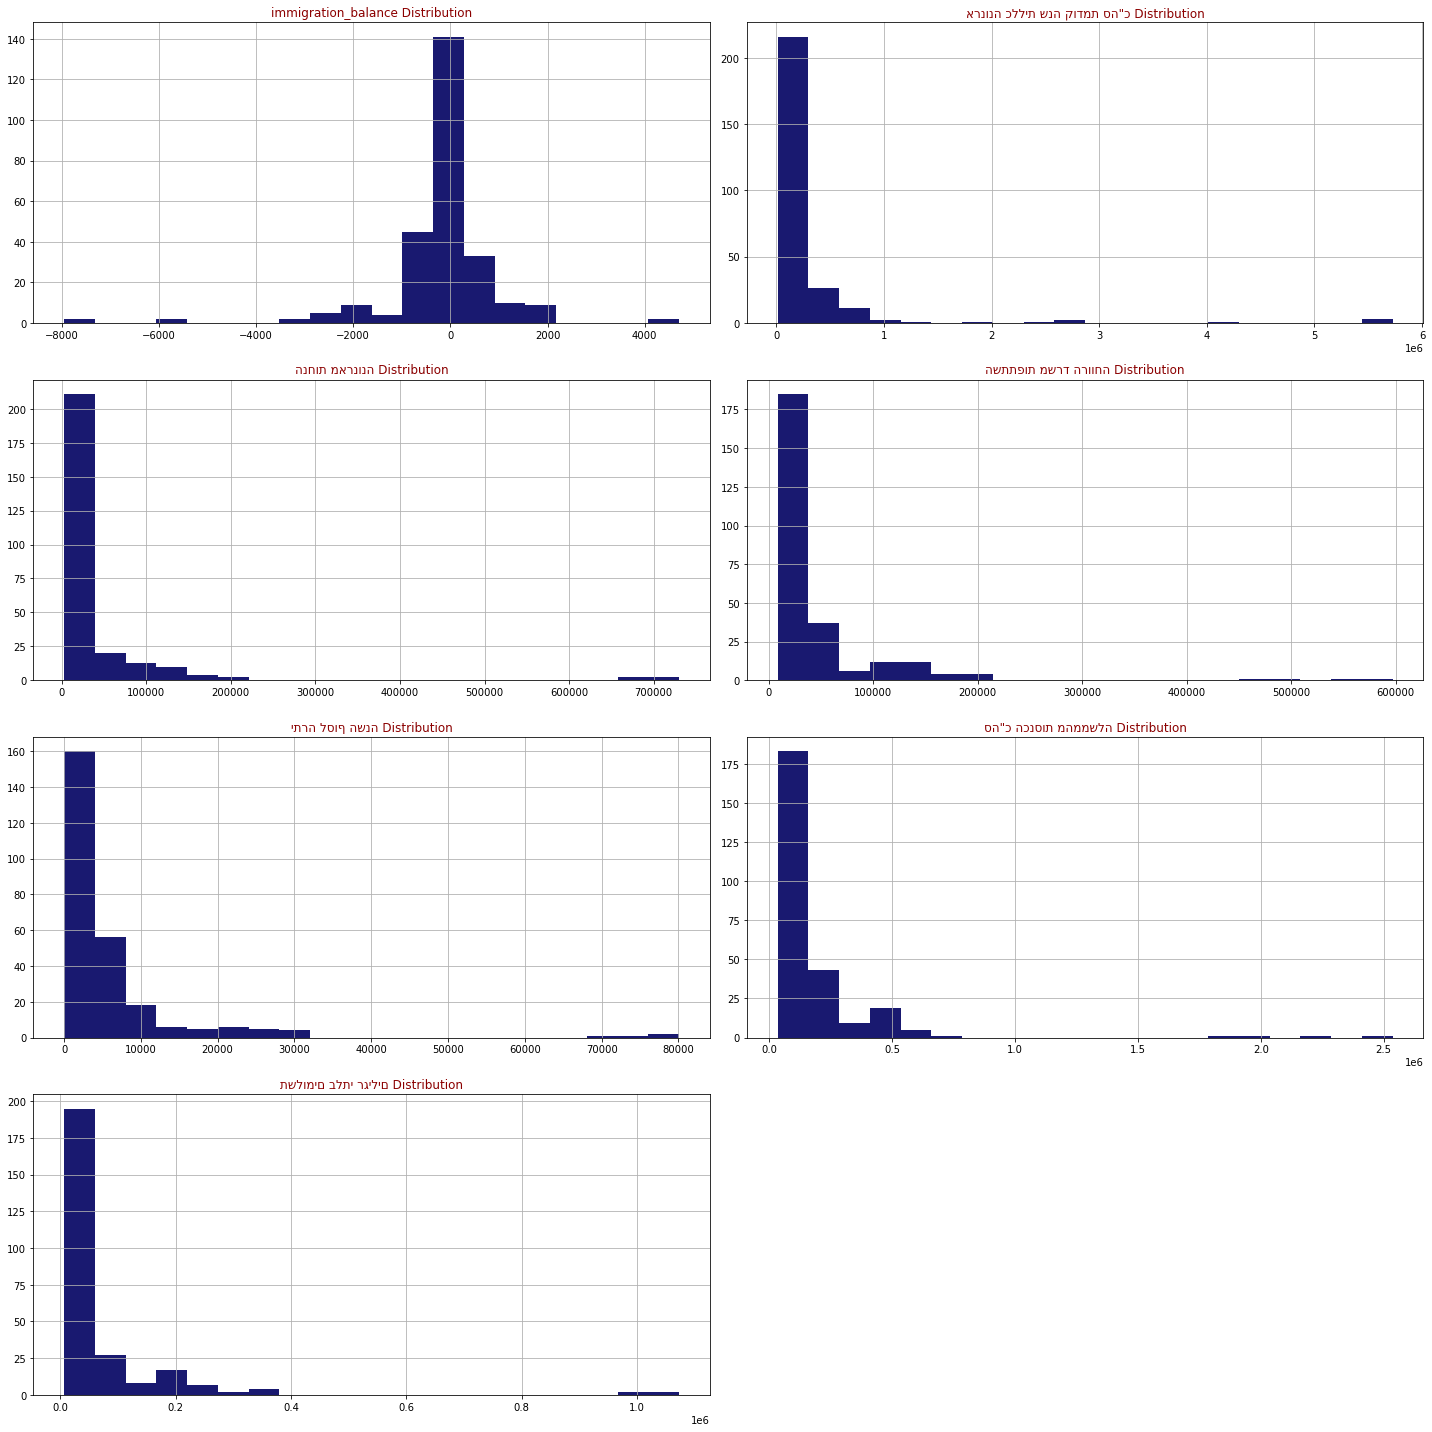

In [61]:
# התפלגות פיצ'רים
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(data_df,data_df.columns,4,2)

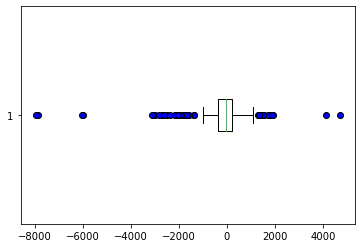

In [93]:
# הצגת ערכי הקיצון של מאזן ההגריה 
# השלב הבא - נמצא את הערים המייצגות את ערכי הקיצון
red_circle = dict(markerfacecolor='blue', marker='o')
plt.boxplot(x=mrg['immigration_balance'], vert=False, flierprops=red_circle);

In [68]:
data_df.describe()
# ניתן מערכי הטבלה את הערך המקסימלי והמינימלי שהם ערכי הקיצון בהתפלגות הפיצ'רים 

,immigration_balance,"ארנונה כללית שנה קודמת סה""כ",הנחות מארנונה,השתתפות משרד הרווחה,יתרה לסוף השנה,"סה""כ הכנסות מהממשלה",תשלומים בלתי רגילים
count,264.000000,2.640000e+02,264.000000,264.000000,264.000000,2.640000e+02,2.640000e+02
mean,-161.446970,2.873237e+05,41178.545455,48386.331174,6222.243371,1.907884e+05,7.598438e+04
std,1228.500708,7.108011e+05,88769.685710,73279.038173,10658.876469,2.723120e+05,1.365295e+05
min,-7952.000000,1.023480e+04,3000.000000,8190.000000,0.000000,3.402100e+04,6.828000e+03
25%,-369.750000,5.124000e+04,11000.000000,17066.250000,1711.000000,8.513175e+04,2.183925e+04
50%,-24.500000,1.163505e+05,18676.000000,24789.000000,2910.000000,1.161585e+05,3.502900e+04
75%,221.250000,2.382980e+05,29425.000000,44151.500000,5876.250000,1.798845e+05,6.221575e+04
max,4708.000000,5.725770e+06,730000.000000,597199.000000,80090.000000,2.536212e+06,1.073000e+06


In [91]:
# מציאת הערים עם ערכי הקיצון
# בתשלומים בלתי רגילים + השתתפות משרד הרווחה ערכי הקיצון הם ירושלים
tbr=mrg.loc[mrg['תשלומים בלתי רגילים'] == 1073000.00]
reveha= mrg[mrg ['השתתפות משרד הרווחה']==597199.00]
jerusalem =data_df2[data_df2['entity']=='ירושלים']

# בארנונה כללית - ערכי הקיצון הם ירושלים חיפה ונצרת
arn=mrg.loc[mrg['ארנונה כללית שנה קודמת סה"כ'] >=1000000.00]
feat=['ארנונה כללית שנה קודמת סה"כ','entity']
arn2 = arn[arn.columns.intersection(feat)]

# ערכי הקיצון של מאזן ההגירה בצד השלילי - אשדוד בני ברק בתים חיפה ירושלים
imr_feat=['immigration_balance','entity']
x= mrg[mrg['immigration_balance']< -2000]
imr_neg=x[x.columns.intersection(imr_feat)]

# ערכ הקיצון של מאזן ההגירה בכיוון החיובי הם ראש העין
y= mrg[mrg['immigration_balance']> 2000]
imr_pos=y[y.columns.intersection(imr_feat)]
imr_pos

# ערכי הקיצון הינם יצוג של הערים הגדולות בישראל, ערכי הקיצון יתרמו לנו בניבוי מאזן ההגירה לערים האלו לכן הוחלט להשאירם

,entity,immigration_balance
266,ראש העין,4119.0
267,ראש העין,4708.0


# מבחנים סטטיסטיים

In [ ]:
# במבחנים הסטיסטיים נבחן את הרשומות בעלות מאזן ההגירה החיובי לעומת השלילי לשנת 2018
mrg_2018=mrg.loc[mrg['year'] == 2018]
mrg_positive=mrg_2018.loc[mrg_2018['immigration_balance'] >0]
mrg_negative=mrg_2018.loc[mrg_2018['immigration_balance'] <0]
#mrg_positive

In [1145]:
m_p=mrg_positive['סה"כ הכנסות מהממשלה'].tolist()
m_n=mrg_negative['סה"כ הכנסות מהממשלה'].tolist()
compare_groups(m_p, m_n, 0.05, 30)

Statistics=-1.748, p=0.085

fail to reject H0 
we conclude that the means are equal 


In [1146]:
A_p=mrg_positive['ארנונה - גביה בשנת הדוח'].tolist()
A_n=mrg_negative['ארנונה - גביה בשנת הדוח'].tolist()
compare_groups(A_p, A_n, 0.05, 30)

Statistics=-1.465, p=0.148

fail to reject H0 
we conclude that the means are equal 


In [1147]:
y_p=mrg_positive['יתרה לתחילת שנה'].tolist()
y_n=mrg_negative['יתרה לתחילת שנה'].tolist()
compare_groups(A_p, A_n, 0.05, 30)

Statistics=-1.465, p=0.148

fail to reject H0 
we conclude that the means are equal 


In [1148]:
t_p=mrg_positive['תשלומים בלתי רגילים'].tolist()
t_n=mrg_negative['תשלומים בלתי רגילים'].tolist()
compare_groups(A_p, A_n, 0.05, 30)

Statistics=-1.465, p=0.148

fail to reject H0 
we conclude that the means are equal 


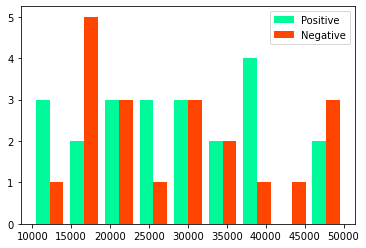

In [1150]:
# תשלומים בלתי רגילים
bins = np.linspace(10000, 50000, 10)
plt.hist([t_p, t_n], bins, label=['Positive', 'Negative'],color=["mediumspringgreen","orangered"])
plt.legend(loc='upper right')
plt.show()

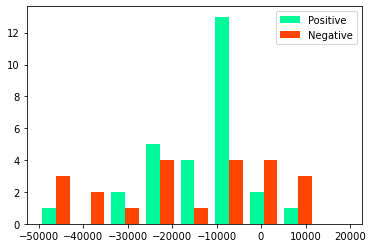

In [1151]:
#יתרה לתחילת שנה
bins = np.linspace(-50000, 20000, 10)
plt.hist([y_p,y_n], bins, label=['Positive', 'Negative'],color=["mediumspringgreen","orangered"])
plt.legend(loc='upper right')
plt.show()

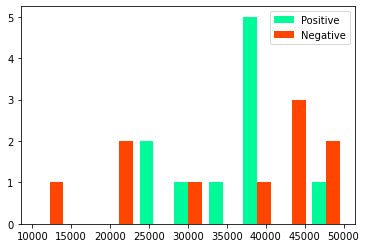

In [1152]:
# ארנונה - גביה בשנת הדוח
bins = np.linspace(10000, 50000, 10)
plt.hist([A_p, A_n], bins, label=['Positive', 'Negative'],color=["mediumspringgreen","orangered"])
plt.legend(loc='upper right')
plt.show()

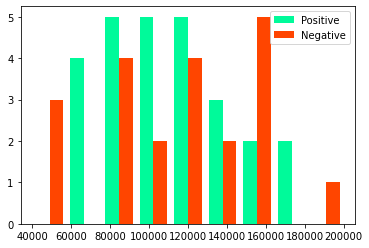

In [1153]:
#סה"כ הכנסות מהממשלה
bins = np.linspace(40000, 200000, 10)
plt.hist([m_p, m_n], bins, label=['Positive', 'Negative'],color=["mediumspringgreen","orangered"])
plt.legend(loc='upper right')
plt.show()

# בחירת פיצ'רים והוספת דוגמאות 

In [97]:
col=mrg.columns
colm = np.asarray(col)
#colm


In [98]:
# לאחר סינון הדאטה החלטנו לבחור פיצ'רים בשיטה הנאיבית לפי הסעיפים שהם מהות הדוחות הכלכליים והפיצ'רים שעיניינו אותנו כתושבים בערים
df1 = mrg[['entity','year','ארנונה - גביה בשנת הדוח' ,'אחוז הגרעון הנצבר מן ההכנסה','הוצאה ממוצעת לנפש בש"ח','תשלומים - חינוך','רווחה','סה"כ הכנסות מהממשלה','סה"כ הוצאות','סה"כ הכנסות','עודף (גרעון) בשנת הדוח בתקציב הרגיל (**)','קרן לעבודות פיתוח','immigration_balance']]
#df1


In [99]:
# הוספת פיצ'רים נוספים בהמלצת המנחים
# הפיצ'רים שהוספמנו הם : מדד סוציואקונומי חברתי כללי, מדד האי שיוויון ג'יני, אחוז הזכאים לתעודת בגרות ומדד הפמפוקטיות
add_features= pd.read_excel("C:\\fitures.xlsx") 
df_new=pd.merge(df1, add_features,how='left', on=['entity','year'])
#df_new


In [100]:
# שינוי שמות הפיצ'רים לאנגלית על מנת לעבוד איתם 
df_new.columns = ['Entity','Year', 'Rates collection', 'Percentage of accumulated deficit from income','Average per capita expenditure in NIS','Education','Welfare','Total income from the government','Total expenses','Total income','Surplus or deficit per year','Development Work','immigration_balance','Socioeconomic cluster from 1 to 10 lowest 1','Percentage of eligible for a Bagrut','Gini Index of Inequality Index 0 Full Equality','Compactness Cluster from 1 to 10 1 highest']
#df_new

In [101]:
# הצלחנו למצוא דוחות משנים נוספות של הערים והוספנו אותם לדאטה הקיים
add_years= pd.read_excel("C:\\years.xlsx") 
df_final=df_new.append(add_years, ignore_index = True)
#df_final

In [102]:
#בדיקה באם יש נאלים  בדאטה הסופי
df_final[df_final.isnull().any(axis=1)]

,Entity,Year,Rates collection,Percentage of accumulated deficit from income,Average per capita expenditure in NIS,Education,Welfare,Total income from the government,Total expenses,Total income,Surplus or deficit per year,Development Work,immigration_balance,Socioeconomic cluster from 1 to 10 lowest 1,Percentage of eligible for a Bagrut,Gini Index of Inequality Index 0 Full Equality,Compactness Cluster from 1 to 10 1 highest


In [103]:
# מציאת ערכי 0 ומילוי ידני בעזרת הדוחות החדשים שמצאנו 
zero=df_final[(df_final == 0).any(axis=1)]
#zero

In [104]:
# נמצאו אפסים בפיצר גרעון\עודף בשנה ובפיצר גרעון\עודף מצטבר מן ההכנסה
# מצאנו את הנתונים הרלוונטים לעיר ולשנה והכנו אקסלים - העלאת האקסלים
deficit_feature= pd.read_excel("C:\\deficit.xlsx") 
P_deficit_income_feature= pd.read_excel("C:\\P_deficit_income.xlsx") 


In [105]:
# על מנת להזין את הנתון התואם לעיר ולשנה העברנו את הנתונים והערים הרלוונטיות לכל פיצ'ר לליסט

deficit = deficit_feature['Surplus or deficit per year'].to_numpy()
entity_deficit= deficit_feature.Entity.unique()

P_deficit_income=P_deficit_income_feature['Percentage of accumulated deficit from income'].to_numpy()
P_entity=P_deficit_income_feature.Entity.unique()

# יצירת מטריצה לנתונים - עמודות הם השנים והשורת הם הערים בהתאמה
arr_deficit = np.reshape(deficit, (9, 4))
arr_deficit_p= np.reshape(P_deficit_income, (8, 4))


In [106]:
# הכנסת נתוני "אחוז הגרעון\עודף המצטבר מן ההכנסה" בהתאמה לעיר ולשנה 
years=[2015,2016,2017,2018]
for i in range(len('P_entity')):
    for j in range(len('years')):
        mask = (df_final['Entity'] == P_entity[i-1]) & (df_final['Year'] == years[j-1])
        df_final['Percentage of accumulated deficit from income'][mask] = arr_deficit_p[i-1,j-1]
        

<ipython-input-106-d56c47cfc9c5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Percentage of accumulated deficit from income'][mask] = arr_deficit_p[i-1,j-1]
<ipython-input-106-d56c47cfc9c5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Percentage of accumulated deficit from income'][mask] = arr_deficit_p[i-1,j-1]
<ipython-input-106-d56c47cfc9c5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Perce

In [107]:
# הכנסת נתוני "גרעון\עודף בשנה" בהתאמה לעיר ולשנה 

years=[2015,2016,2017,2018]
for i in range(len('entity_deficit')):
    for j in range(len('years')):
        mask = (df_final['Entity'] == entity_deficit[i-1]) & (df_final['Year'] == years[j-1])
        df_final['Surplus or deficit per year'][mask] = arr_deficit[i-1,j-1]
        


<ipython-input-107-ba8e7c2a5842>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Surplus or deficit per year'][mask] = arr_deficit[i-1,j-1]
<ipython-input-107-ba8e7c2a5842>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Surplus or deficit per year'][mask] = arr_deficit[i-1,j-1]
<ipython-input-107-ba8e7c2a5842>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Surplus or deficit per year'][mask] = arr_def

IndexError: index 9 is out of bounds for axis 0 with size 9

In [108]:
# וידוא כי לא נותרו ערכי אפס פקטיביים - כל האפסים הם אפסים האמיתיים לפי הדו"חות 
zero1=df_final[(df_final == 0).any(axis=1)]
zero1

,Entity,Year,Rates collection,Percentage of accumulated deficit from income,Average per capita expenditure in NIS,Education,Welfare,Total income from the government,Total expenses,Total income,Surplus or deficit per year,Development Work,immigration_balance,Socioeconomic cluster from 1 to 10 lowest 1,Percentage of eligible for a Bagrut,Gini Index of Inequality Index 0 Full Equality,Compactness Cluster from 1 to 10 1 highest
302,מגדל העמק,2011,57026.0,0.055612,6457.468880,33562.0,23974.0,54018.0,155625.0,155272.0,0.0,16244.0,-167.0,5,41.0,0.3849,4
468,אור עקיבא,2014,12561.0,0.296970,8675.297619,35722.0,17702.0,53295.0,145745.0,143964.0,0.0,14884.0,10.0,4,69.5,0.3663,2
495,יהוד - מונסון,2014,47023.0,0.016569,7268.280702,40216.0,16729.0,33190.0,207146.0,213409.0,0.0,20574.0,-60.0,7,75.4,0.4505,3
518,עראבה,2014,13899.0,0.102446,5073.319149,63694.0,15184.0,88774.0,140215.0,141060.0,77.0,20159.0,0.0,2,60.9,0.3750,3


In [109]:
# הדאטה הסופי שלנו - השמטת הישוב והשנה שהם עמודות לא נחוצות לניבוי
df_final.drop(['Entity', 'Year'], axis=1, inplace=True)
df_final

,Rates collection,Percentage of accumulated deficit from income,Average per capita expenditure in NIS,Education,Welfare,Total income from the government,Total expenses,Total income,Surplus or deficit per year,Development Work,immigration_balance,Socioeconomic cluster from 1 to 10 lowest 1,Percentage of eligible for a Bagrut,Gini Index of Inequality Index 0 Full Equality,Compactness Cluster from 1 to 10 1 highest
0,37924.0,0.300000,5110.950000,148879.0,29281.0,186692.0,270446.0,255189.0,15257.0,14677.0,12.0,2,53.300000,0.378600,7
1,37797.0,0.290000,5639.510000,150616.0,30160.0,201961.0,276005.0,276005.0,14344.0,16301.0,-41.0,2,52.900000,0.382700,7
2,40414.0,0.300000,5531.090000,168718.0,33760.0,215495.0,309154.0,294964.0,14128.0,2426.0,-132.0,2,60.000000,0.384600,7
3,44141.0,0.220000,5683.240000,166463.0,35452.0,234906.0,320440.0,320440.0,-13.0,680.0,-106.0,2,57.757167,0.400034,8
4,31813.0,0.120000,5146.440000,38983.0,19347.0,90940.0,146720.0,144547.0,2173.0,5658.0,-213.0,3,47.100000,0.383900,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,44712.0,0.050303,5247.724868,51136.0,34602.0,94630.0,198364.0,196986.0,-1125.0,10242.0,-105.0,5,62.000000,0.413200,3
595,63639.0,0.098777,5169.194805,51778.0,22423.0,42745.0,199014.0,210626.0,-1226.0,13142.0,23.0,6,62.700000,0.440500,4
596,39122.0,0.195242,7805.000000,32848.0,20976.0,63233.0,162344.0,153138.0,-10042.0,14863.0,-213.0,4,47.800000,0.357200,1
597,37253.0,0.121860,7084.077253,56234.0,20278.0,83409.0,165059.0,164517.0,-4702.0,13754.0,-160.0,5,58.000000,0.376900,4


In [110]:
# יצוא הדאטה הסופי לאקסל והמשך עבודה בקולב 
import base64
from IPython.display import HTML
def create_download_link( df, title = "Download CSV file", filename = "data.csv"):
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)
create_download_link(df_final)
#df_final.to_csv('df_final.csv')
#files.download('df_final.csv')
